<a href="https://colab.research.google.com/github/stephiioo/datasci_3_eda/blob/main/Homework_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load in packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Load in dataset

In [ ]:
csv1 = pd.read_csv('/content/heart.csv')
csv1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Identifying and handling missing values in the dataset

In [ ]:
# check for missing values and count them
missing_values = csv1.isna().sum()

# calculate the percentage of missing values
percentage_missing = (missing_values / len(csv1)) * 100

# Display of the results
print("Missing Values:")
print(missing_values)
print("\nPercent of Missing Values:")
print(percentage_missing)

Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Percent of Missing Values:
Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


##Removing any duplicate rows and columns if they exist

In [ ]:
# Remove duplicate rows
csv1_no_duplicates = csv1.drop_duplicates()

# Check for duplicate columns
duplicate_columns = csv1_no_duplicates.columns[csv1_no_duplicates.columns.duplicated()]

# Remove duplicate columns
csv1_no_duplicate_columns = csv1_no_duplicates[csv1_no_duplicates.columns[~csv1_no_duplicates.columns.duplicated()]]

##Cleaning column names

In [ ]:
# Clean the column names
csv1.columns = csv1.columns.str.lower()
csv1.columns = csv1.columns.str.strip()
csv1.columns = csv1.columns.str.replace(' ', '_')
csv1.columns = csv1.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

# Print the updated column names
print(csv1.columns)

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')


##Look for outliers

In [ ]:
csv1.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#Unvariate Analysis of Resting Blood Pressure

##calculate measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR)

In [ ]:
# calculate the measures of central tenency
mean_restingbp = csv1['restingbp'].mean()
median_restingbp = csv1['restingbp'].median()
mode_restingbp = csv1['restingbp'].iloc[0]

# calculate the measures of measures of spread

minimum_restingbp = csv1['restingbp'].min()
maximum_restingbp = csv1['restingbp'].max()

variance_restingbp = csv1['restingbp'].var()

std_dev_restingbp = csv1['restingbp'].std()

Q1_restingbp = csv1['restingbp'].quantile(0.25)
Q3_restingbp = csv1['restingbp'].quantile(0.75)
iqr_restingbp = Q1_restingbp - Q3_restingbp

# display the results
summary = pd.DataFrame({
    'Mean': [mean_restingbp],
    'Median': [median_restingbp],
    'Mode': [mode_restingbp],
    'Minimum': [minimum_restingbp],
    'Maximum': [maximum_restingbp],
    'Variance': [variance_restingbp],
    'Std Dev': [std_dev_restingbp],
    'IQR': [iqr_restingbp]
})

print(summary)

         Mean  Median  Mode  Minimum  Maximum    Variance    Std Dev   IQR
0  132.396514   130.0   140        0      200  342.773903  18.514154 -20.0


#data visualization

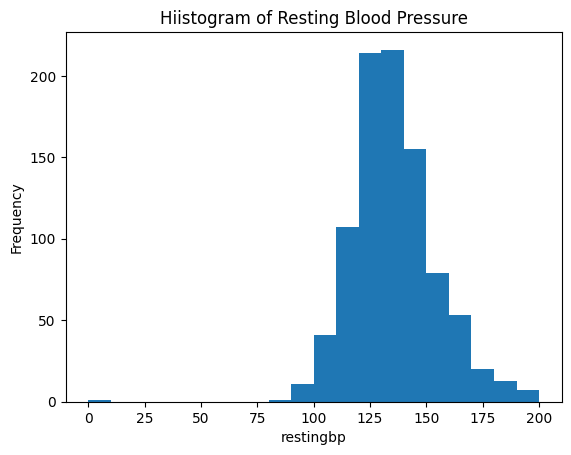

In [ ]:
csv1['restingbp'].plot.hist(bins=20)
plt.xlabel('restingbp')
plt.ylabel('Frequency')
plt.title('Hiistogram of Resting Blood Pressure')
plt.show()

#Bivariate Analysis of Resting Blood Pressure

##create a scatter plot to visualize the relationship between two numerical variables

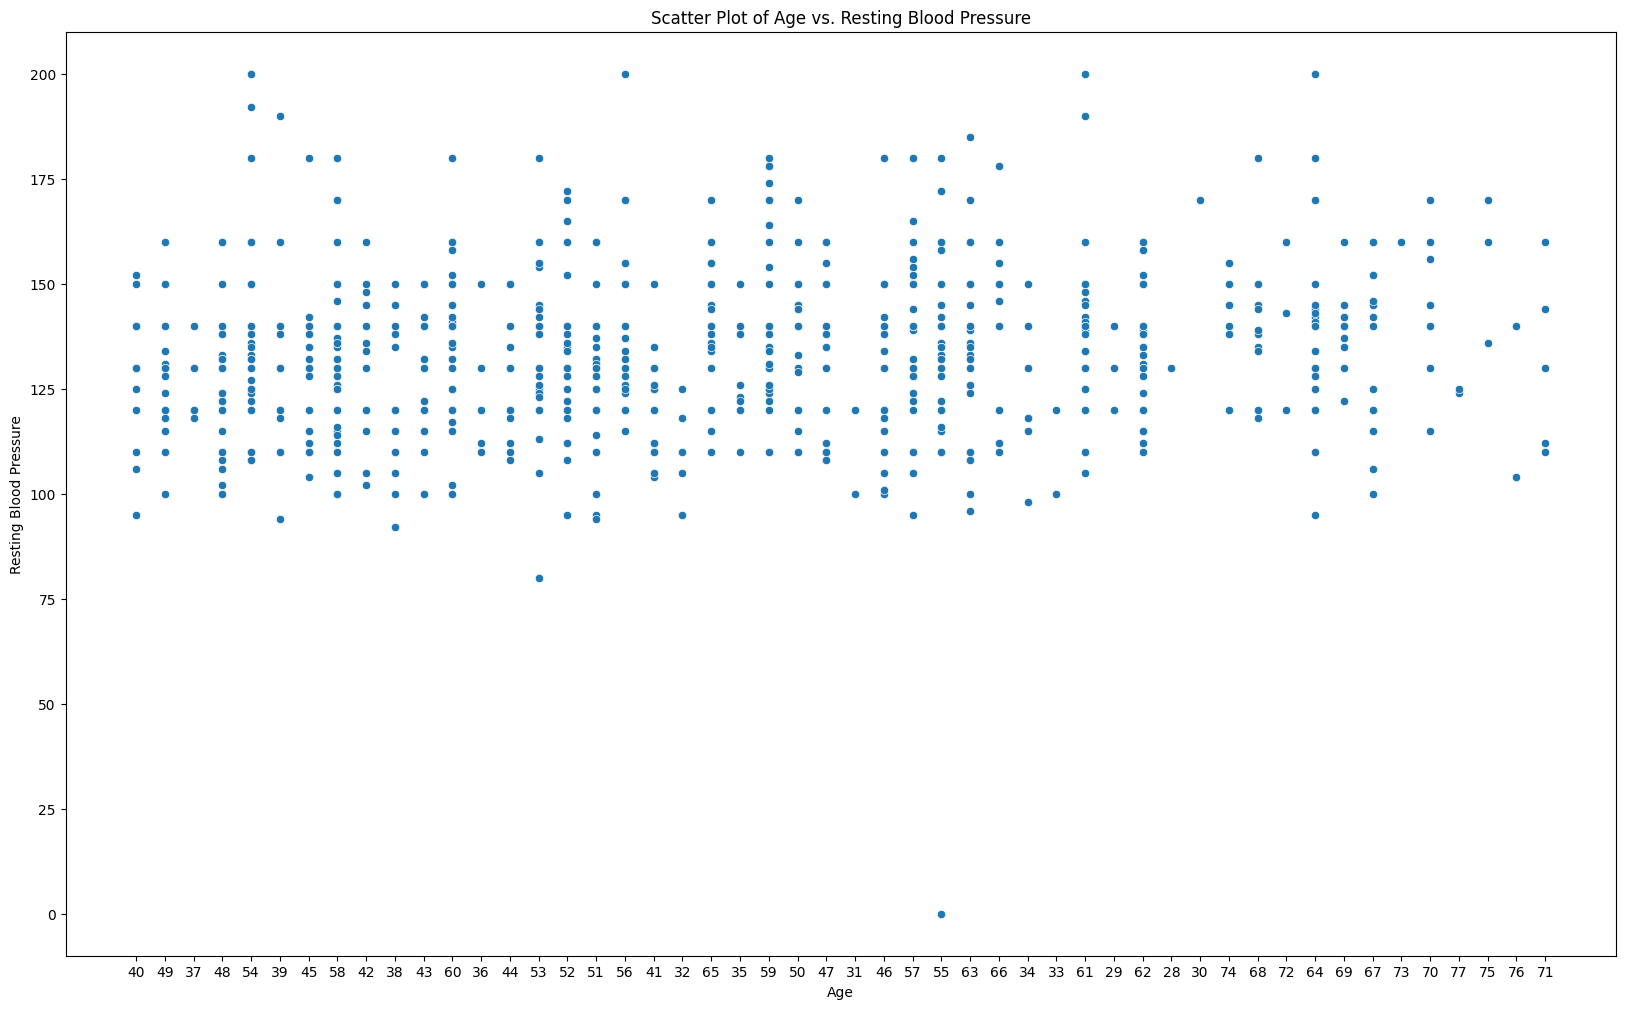

In [41]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='age', y='restingbp', data=csv1)
plt.title('Scatter Plot of Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

##create a boxplot to visualize the relationship between a categorical variable

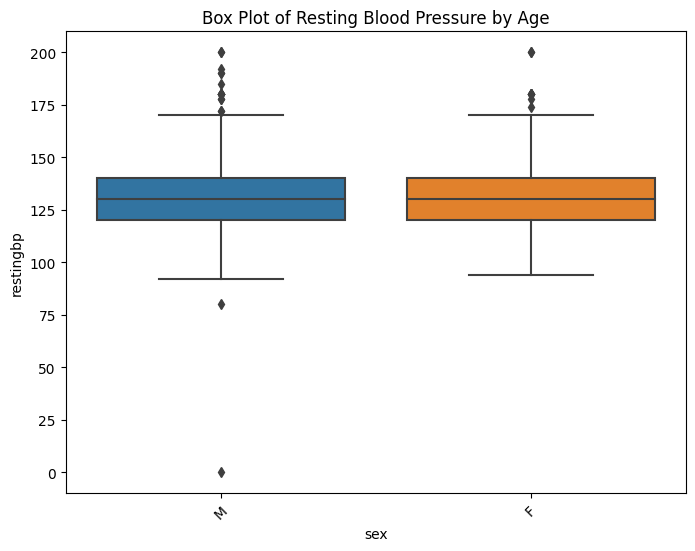

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='restingbp', data=csv1)
plt.title('Box Plot of Resting Blood Pressure by Age')
plt.xlabel('sex')
plt.ylabel('restingbp')
plt.xticks(rotation=45)
plt.show()

##compute correlation coefficients for numerical variables and document any strong correlations observed.

<ipython-input-45-15504cbd52a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = csv1.corr()


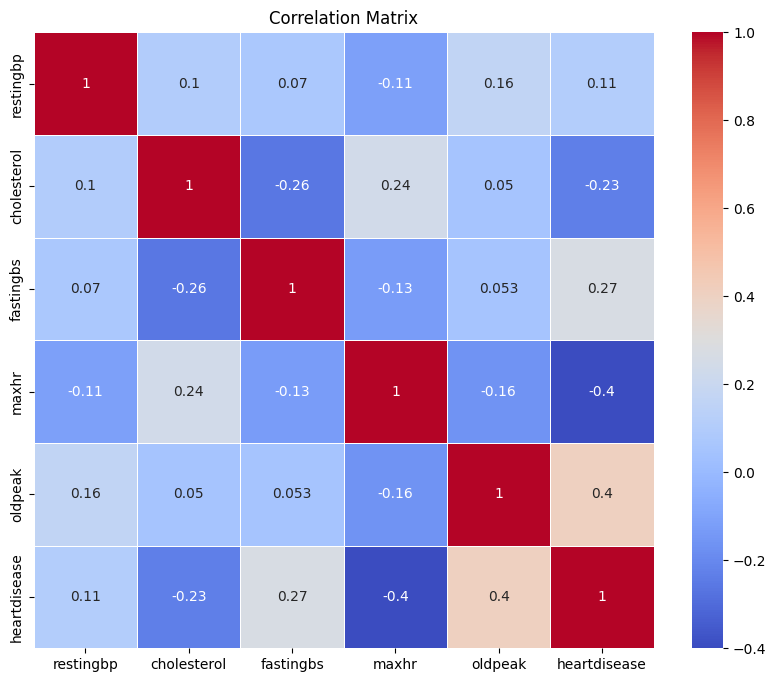

In [45]:
# compute correlation matrix
correlation_matrix = csv1.corr()

# visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

###documenting strong correlation observed:
####-

#Handling Outliers

In [51]:
Q1_restingbp = csv1['restingbp'].quantile(0.25)
Q3_restingbp = csv1['restingbp'].quantile(0.75)
iqr_restingbp = Q3_restingbp - Q1_restingbp
lower_bound = Q1_restingbp - 1.5 * iqr_restingbp
upper_bound = Q3_restingbp + 1.5 * iqr_restingbp
outliers = (csv1['restingbp'] < lower_bound) | (csv1['restingbp'] > upper_bound)
print("Outliers in 'restingbp' column:")
print(csv1[outliers])

Outliers in 'restingbp' column:
    age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  \
109  39   M           ATA        190          241          0     Normal   
123  58   F           ATA        180          393          0     Normal   
189  53   M           ASY        180          285          0         ST   
190  46   M           ASY        180          280          0         ST   
241  54   M           ASY        200          198          0     Normal   
274  45   F           ATA        180          295          0     Normal   
275  59   M           NAP        180          213          0     Normal   
278  57   F           ASY        180          347          0         ST   
314  53   M           ASY         80            0          0     Normal   
365  64   F           ASY        200            0          0     Normal   
372  63   M           ASY        185            0          0     Normal   
399  61   M           NAP        200            0          1        

###approach: keep outliers because the data represented is relevant to understanding the correlation between heart disease and other factors such as age, cholesterol, blood pressure etc

#Automated Analysis

In [56]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl (357 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)


In [61]:
import pandas as pd
from pandas_profiling import ProfileReport
csv1 = pd.read_csv('/content/heart.csv')
profile = ProfileReport(csv1, title='automaticEDA', explorative=True)
profile.to_notebook_iframe
profile.to_file("automaticEDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]